<a href="https://colab.research.google.com/github/destroyedprawn/ECGR-4106-Real-Time-Machine-Learning/blob/main/Homework1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Homework 1**

# Problem 1

Problem 1

In [ ]:
import torch

# Import images
from PIL import Image
img_Red1 = Image.open("/content/drive/MyDrive/Colab Notebooks/TestImages/Homework 1/main-qimg-3cc976ddd0c6fb15933124b0b2bc5ac0-c.jpg")
img_Red2 = Image.open("/content/drive/MyDrive/Colab Notebooks/TestImages/Homework 1/red-780x400.jpg")
img_Blue1 = Image.open("/content/drive/MyDrive/Colab Notebooks/TestImages/Homework 1/blue-jay.jpg")
img_Blue2 = Image.open("/content/drive/MyDrive/Colab Notebooks/TestImages/Homework 1/Dorsal-view-of-male-butterfly-which-was-captured-in-Peru-and-is-stored-in-Museum-de-Toulouse..jpg-.jpg")
img_Green1 = Image.open("/content/drive/MyDrive/Colab Notebooks/TestImages/Homework 1/Green-tree-python-Morelia-viridis-snake-1024x684.jpg.webp")
img_Green2 = Image.open("/content/drive/MyDrive/Colab Notebooks/TestImages/Homework 1/kiwi-fruite-1024x682.jpg")



In [ ]:
# 1.b Load each image, and convert it to a tensor.

# Convert image to tensor
from torchvision import transforms
preprocess = transforms.Compose([
        transforms.ToTensor()
       ])

# Apply Preprocess funtion to each image
img_Red1_t = preprocess(img_Red1)
img_Red2_t = preprocess(img_Red2)
img_Blue1_t = preprocess(img_Blue1)
img_Blue2_t = preprocess(img_Blue2)
img_Green1_t = preprocess(img_Green1)
img_Green2_t = preprocess(img_Green2)



In [ ]:
# 1.c. For each image tensor, use the .mean() method to get a sense of how bright the image is.
# Store mean values
Red1_brightness = img_Red1_t.mean()
Red2_brightness = img_Red2_t.mean()
Blue1_brightness = img_Blue1_t.mean()
Blue2_brightness = img_Blue2_t.mean()
Green1_brightness = img_Green1_t.mean()
Green2_brightness = img_Green2_t.mean()

# Print image brightness
print("Red1 brightness",'\t', Red1_brightness, '\n'
      "Red2 brightness",'\t', Red2_brightness, '\n'
      "Blue1 brightness",'\t', Blue1_brightness, '\n'
      "Blue2 brightness",'\t', Blue2_brightness, '\n'
      "Green1 brightness",'\t', Green1_brightness, '\n'
      "Green2 brightness",'\t', Green2_brightness, '\n'
      )

Red1 brightness 	 tensor(0.4230) 
Red2 brightness 	 tensor(0.4360) 
Blue1 brightness 	 tensor(0.2816) 
Blue2 brightness 	 tensor(0.7568) 
Green1 brightness 	 tensor(0.3140) 
Green2 brightness 	 tensor(0.3050) 



In [ ]:
# 1.d Take the mean of each channel of your images. Can you identify the red, green, and blue items from only the channel averages?
# Prints RGB Values
def printRGBChannels(imgTensor):
  [imgTensorMean_r, imgTensorMean_g, imgTensorMean_b] = imgTensor.mean(dim = [1,2])
  print("Red Channel Mean:", imgTensorMean_r,'\t', "Green Channel Mean:", imgTensorMean_g,'\t', "Blue Channel Mean: ", imgTensorMean_b)

# Printing the image name along with RGB channel averages
print("img_Red1"), printRGBChannels(img_Red1_t)
print("img_Red2"), printRGBChannels(img_Red2_t)
print("img_Green1"), printRGBChannels(img_Green1_t)
print("img_Green2"), printRGBChannels(img_Green2_t)
print("img_Blue1"), printRGBChannels(img_Blue1_t)
print("img_Blue2"), printRGBChannels(img_Blue2_t)



img_Red1
Red Channel Mean: tensor(0.7227) 	 Green Channel Mean: tensor(0.2828) 	 Blue Channel Mean:  tensor(0.2636)
img_Red2
Red Channel Mean: tensor(0.8550) 	 Green Channel Mean: tensor(0.2780) 	 Blue Channel Mean:  tensor(0.1751)
img_Green1
Red Channel Mean: tensor(0.3229) 	 Green Channel Mean: tensor(0.4629) 	 Blue Channel Mean:  tensor(0.1561)
img_Green2
Red Channel Mean: tensor(0.3707) 	 Green Channel Mean: tensor(0.3991) 	 Blue Channel Mean:  tensor(0.1454)
img_Blue1
Red Channel Mean: tensor(0.1686) 	 Green Channel Mean: tensor(0.3798) 	 Blue Channel Mean:  tensor(0.2965)
img_Blue2
Red Channel Mean: tensor(0.6820) 	 Green Channel Mean: tensor(0.7546) 	 Blue Channel Mean:  tensor(0.8338)


(None, None)

# Problem 2

Problem 2 (40 pts):

In our temperature prediction example, let’s change our model to a non-linear system. Consider the following description for our model:

w2 * t_u ** 2 + w1 * t_u + b.

In [58]:
# 2.a Modify the training loop properly to accommodate this redefinition. 
import torch 

# Import data
t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]

# Convert data to tensor
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

# Normalize data
t_un = t_u * 0.1

# Model defintion
def model(t_u, w2, w1, b):
  return w2 * t_u ** 2 + w1 * t_u + b

# Loss function definition
def loss_fn(t_p, t_c):
  squared_diffs = (t_p - t_c)**2
  return squared_diffs.mean()

# Initial parameter values
params = torch.tensor([1.0, 1.0, 1.0], requires_grad=True)

# Training loop using autograd
def training_loop(n_epochs, learning_rate, params, t_u, t_c):
  # Iterates through n number of epochs
  for epoch in range(1, n_epochs + 1):
    if params.grad is not None:
      params.grad.zero_()

  # Using current parameters, make predicted tensor with model
    t_p = model(t_u, *params)

  # Compare predicted values to  
    loss = loss_fn(t_p, t_c)
    loss.backward()

  # Apply loss gradient with learning rate to parameters
    with torch.no_grad():
      params -= learning_rate * params.grad

  # Print every 500 epochs
    if epoch % 500 == 0:
      print('Epoch %d, Loss %f' % (epoch, float(loss)))

  # Return parameters
  return params

In [60]:
# 2.b Use 5000 epochs for your training. Explore different learning rates from 0.1 to 0.0001 (you need four separate trainings). Report your loss for every 500 epochs per training.
# Using learning rate 0.0001
n_epochs = 5000
learning_rate = 0.0001
# Reseting Params
params = torch.tensor([1.0, 1.0, 1.0], requires_grad=True)
training_loop(n_epochs, learning_rate, params, t_un, t_c)



Epoch 500, Loss 13.295361
Epoch 1000, Loss 10.560289
Epoch 1500, Loss 8.613449
Epoch 2000, Loss 7.227292
Epoch 2500, Loss 6.239962
Epoch 3000, Loss 5.536327
Epoch 3500, Loss 5.034493
Epoch 4000, Loss 4.676206
Epoch 4500, Loss 4.420029
Epoch 5000, Loss 4.236486


tensor([ 0.5772, -1.1620,  0.0031], requires_grad=True)

In [59]:
# 2.b Using learning rate 0.001
learning_rate = 0.001
# Reseting Params
params = torch.tensor([1.0, 1.0, 1.0], requires_grad=True)
# Train params
training_loop(n_epochs, learning_rate, params, t_un, t_c)



Epoch 500, Loss nan
Epoch 1000, Loss nan
Epoch 1500, Loss nan
Epoch 2000, Loss nan
Epoch 2500, Loss nan
Epoch 3000, Loss nan
Epoch 3500, Loss nan
Epoch 4000, Loss nan
Epoch 4500, Loss nan
Epoch 5000, Loss nan


tensor([nan, nan, nan], requires_grad=True)

In [ ]:
# 2.b Using learning rate 0.01
learning_rate = 0.01
# Reseting Params
params = torch.tensor([1.0, 1.0, 1.0], requires_grad=True)
# Train params
training_loop(n_epochs, learning_rate, params, t_un, t_c)



Epoch 500, Loss nan
Epoch 1000, Loss nan
Epoch 1500, Loss nan
Epoch 2000, Loss nan
Epoch 2500, Loss nan
Epoch 3000, Loss nan
Epoch 3500, Loss nan
Epoch 4000, Loss nan
Epoch 4500, Loss nan
Epoch 5000, Loss nan


tensor([nan, nan, nan], requires_grad=True)

In [ ]:
# 2.b Using learning rate 0.1
learning_rate = 0.1
# Reseting Params
params = torch.tensor([1.0, 1.0, 1.0], requires_grad=True)
# Train params
training_loop(n_epochs, learning_rate, params, t_un, t_c)



Epoch 500, Loss nan
Epoch 1000, Loss nan
Epoch 1500, Loss nan
Epoch 2000, Loss nan
Epoch 2500, Loss nan
Epoch 3000, Loss nan
Epoch 3500, Loss nan
Epoch 4000, Loss nan
Epoch 4500, Loss nan
Epoch 5000, Loss nan


tensor([nan, nan, nan], requires_grad=True)

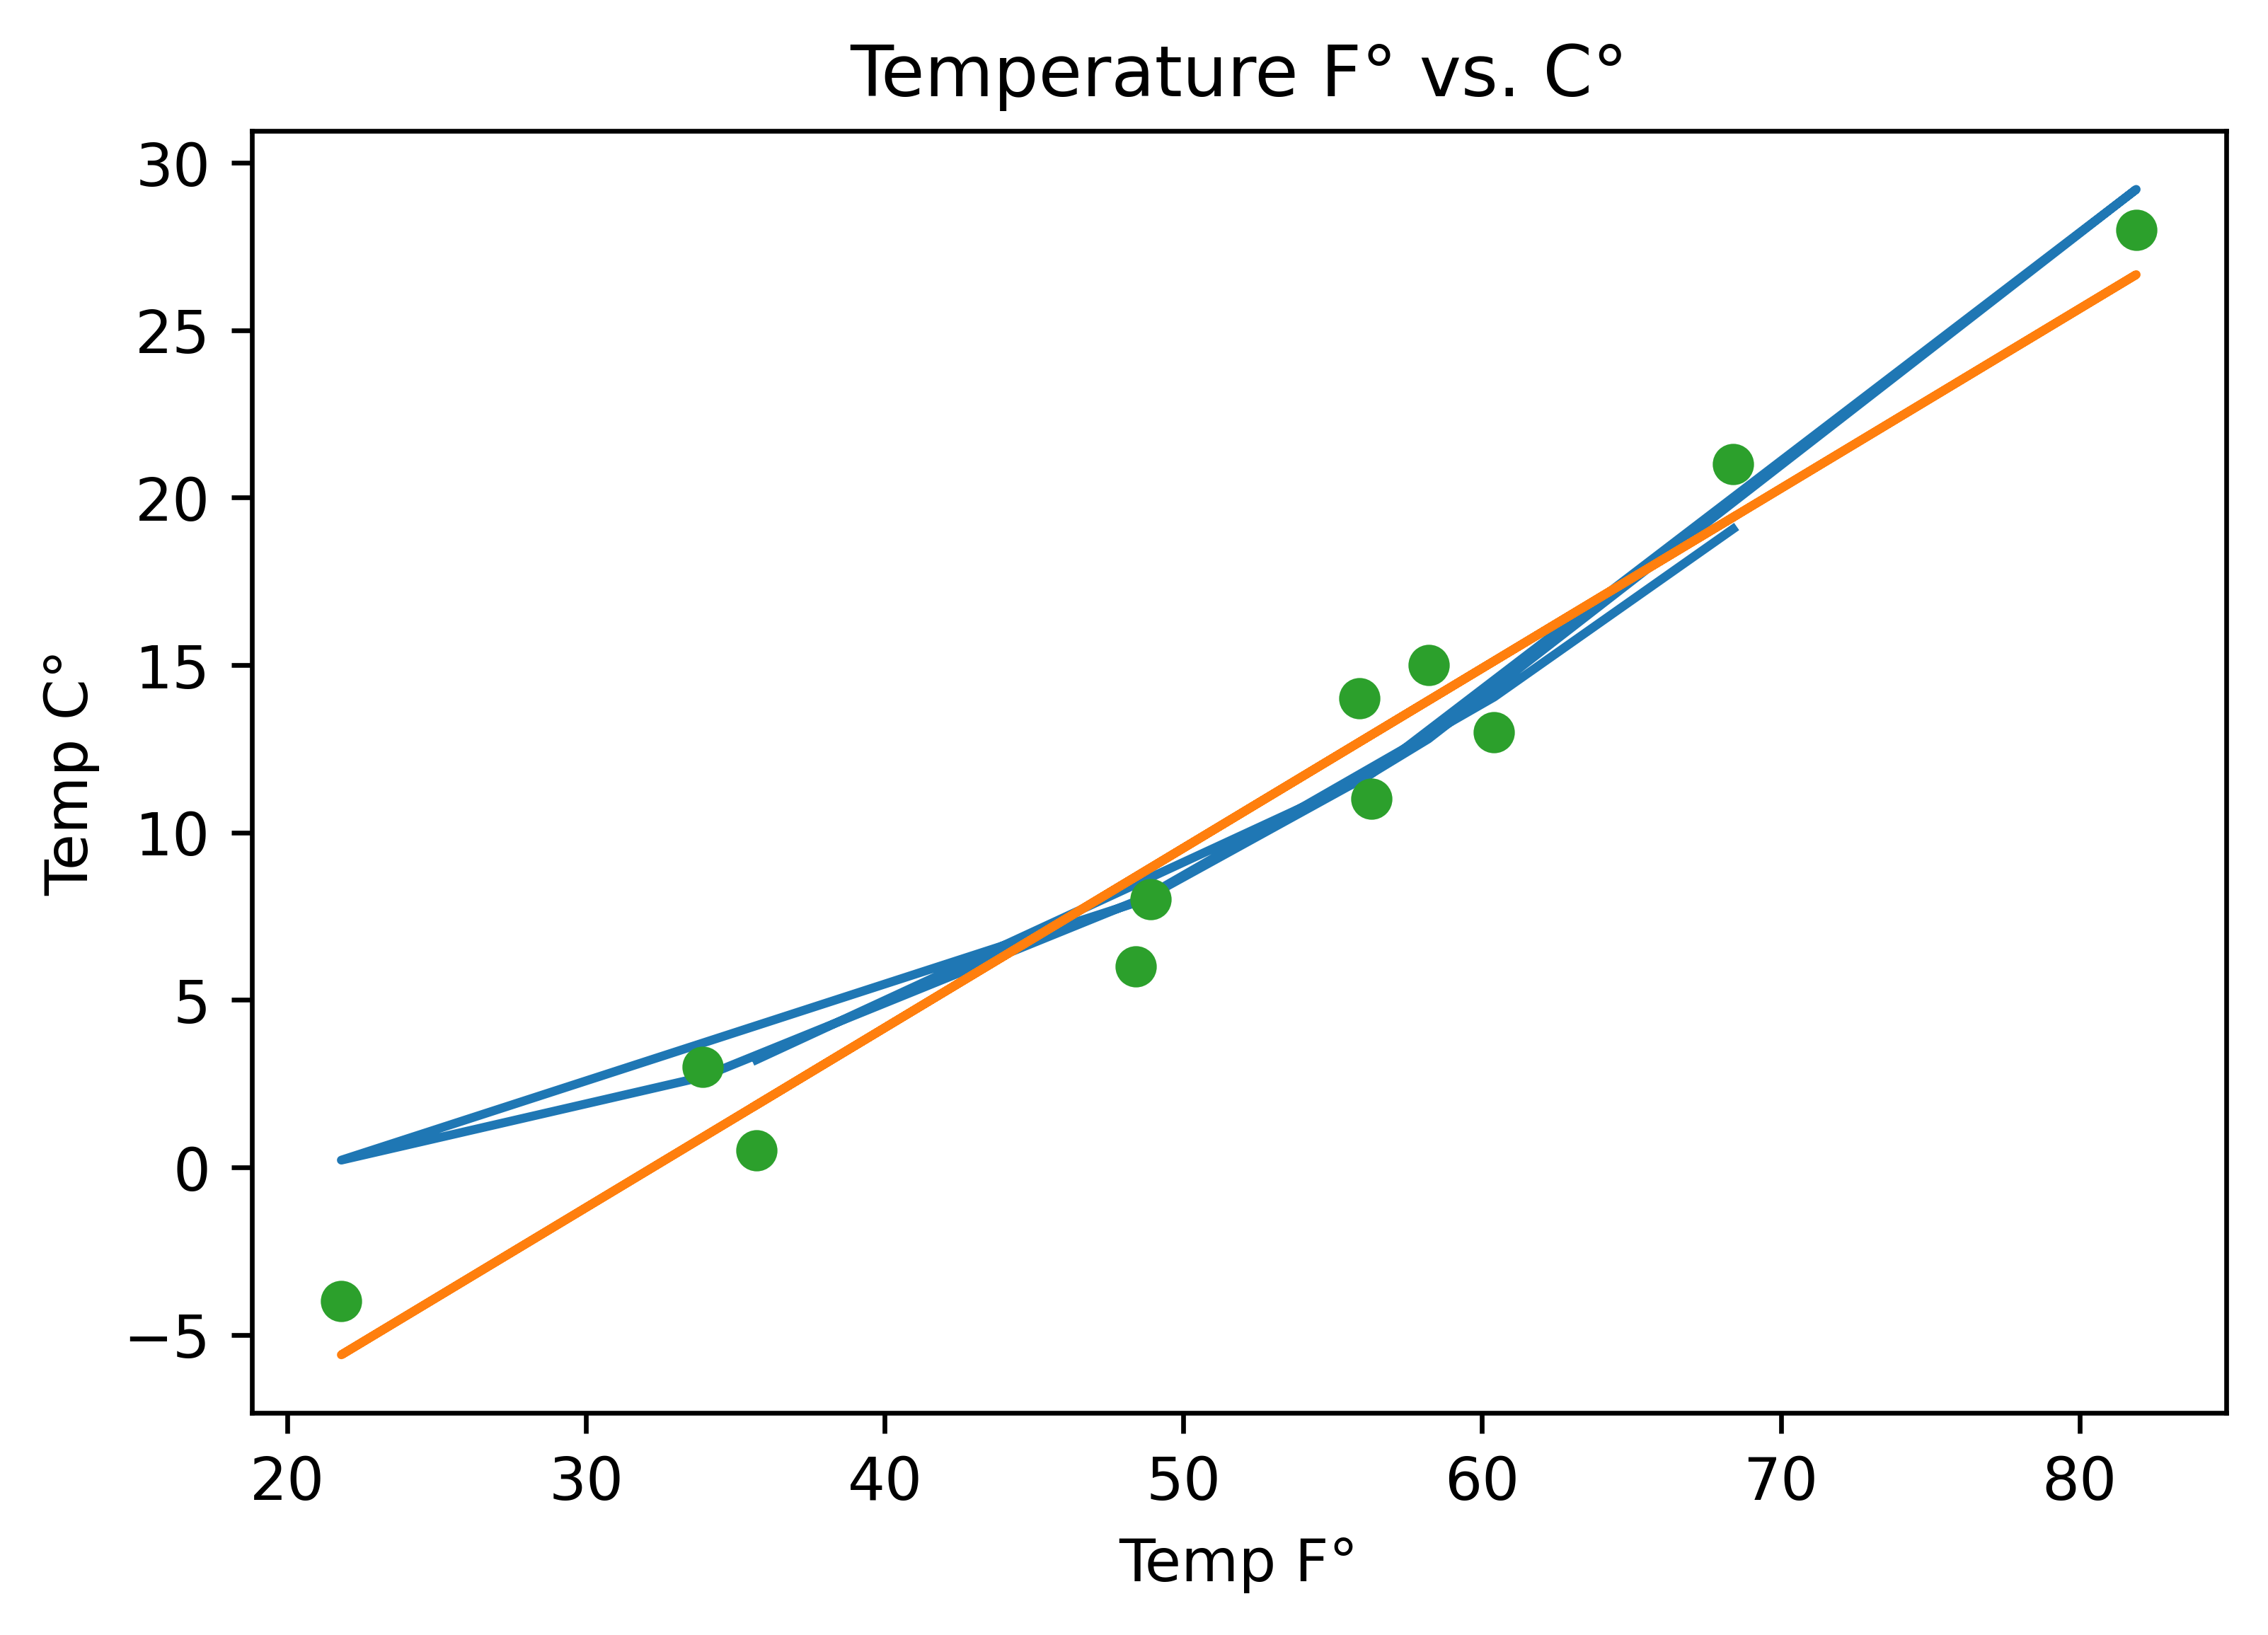

In [50]:
# 2.c Pick the best non-linear model and compare your final best loss against the linear model that we did during the lecture. 
# For this, visualize the non-linear model against the linear model over the input dataset, as we did during the lecture. Is the actual result better or worse than our baseline linear model?
%matplotlib inline
from matplotlib import pyplot as plt
# From slides
t_PL = t_un * 5.3671 - 17.30121
# Apply params to new model
t_p = model(t_un, *params)
# Visualize model
fig = plt.figure(dpi=600)
plt.xlabel("Temp F°")
plt.ylabel("Temp C°")
plt.title("Temperature F° vs. C°")
# Non-Linear Model
plt.plot(t_u.numpy(), t_p.detach().numpy())
# Linear Model
plt.plot(t_u.numpy(), t_PL)
# Actual Values
plt.plot(t_u.numpy(), t_c.numpy(), 'o')


# Problem 3

Problem 3 (40 pts):

3.a. Develop preprocessing and a training loop to train a linear regression model that predicts housing price based on the following input variables:

 

area, bedrooms, bathrooms, stories, parking

 

For this, you need to use the housing dataset. See example on Canvas. Identify the best parameters for your linear regression model, based on the above input variables. In this case, you will have six parameters:

U=W5*X5 + W4*X4 + W3*X3 + W2*X2 + W1*X1 + B

In [61]:
import torch 
import numpy as np
import pandas as pd

# Data Visualisation
import matplotlib.pyplot as plt

housing = pd.DataFrame(pd.read_csv("/content/drive/MyDrive/Colab Notebooks/TestImages/Housing.csv"))

num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price'] 

# Preprocessing split column values
# Area is scaled down to normalize
x1 = .01 * housing['area']
x2 = housing['bedrooms']
x3 = housing['bathrooms']
x4 = housing['stories']
x5 = housing['parking']
inputPrices_u = housing['price']

# Converting columns to tensors
t_u = torch.tensor(inputPrices_u)
x1 = torch.tensor(x1)
x2 = torch.tensor(x2)
x3 = torch.tensor(x3)
x4 = torch.tensor(x4)
x5 = torch.tensor(x5)

# Linear Model Definition
def model(x1, x2, x3, x4, x5, w1, w2, w3, w4, w5, b):
  return w5*x5 + w4*x4 + w3*x3 + w2*x2 + w1*x1 + b

# Loss Function Defintion
def loss_fn(t_p, t_c):
  squared_diffs = (t_p - t_c)**2
  return squared_diffs.mean()

# Default Paramerter values, autograd on
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 1.0], requires_grad=True)

# Training Loop iterates through n epochs and returns parameters
def training_loop(n_epochs, learning_rate, params, x1, x2, x3, x4, x5):
  for epoch in range(1, n_epochs + 1):
    if params.grad is not None:
      params.grad.zero_()

# Generate predicted values with model
    t_p = model(x1, x2, x3, x4, x5, *params)

# Calculate loss
    loss = loss_fn(t_p, t_u)
    loss.backward()

# Apply loss gradient to parameters
    with torch.no_grad():
      params -= learning_rate * params.grad

# Output every 500 epochs
    if epoch % 500 == 0:
      print('Epoch %d, Loss %f' % (epoch, float(loss)))
  return params

Epoch 500, Loss 2696512686734.713379
Epoch 1000, Loss 2318184773435.221191
Epoch 1500, Loss 2088648266388.312500
Epoch 2000, Loss 1947396484269.651367
Epoch 2500, Loss 1858697932496.546387
Epoch 3000, Loss 1801433157258.685303
Epoch 3500, Loss 1763107250609.892090
Epoch 4000, Loss 1736310509481.270996
Epoch 4500, Loss 1716639634828.789062
Epoch 5000, Loss 1701466170927.005127


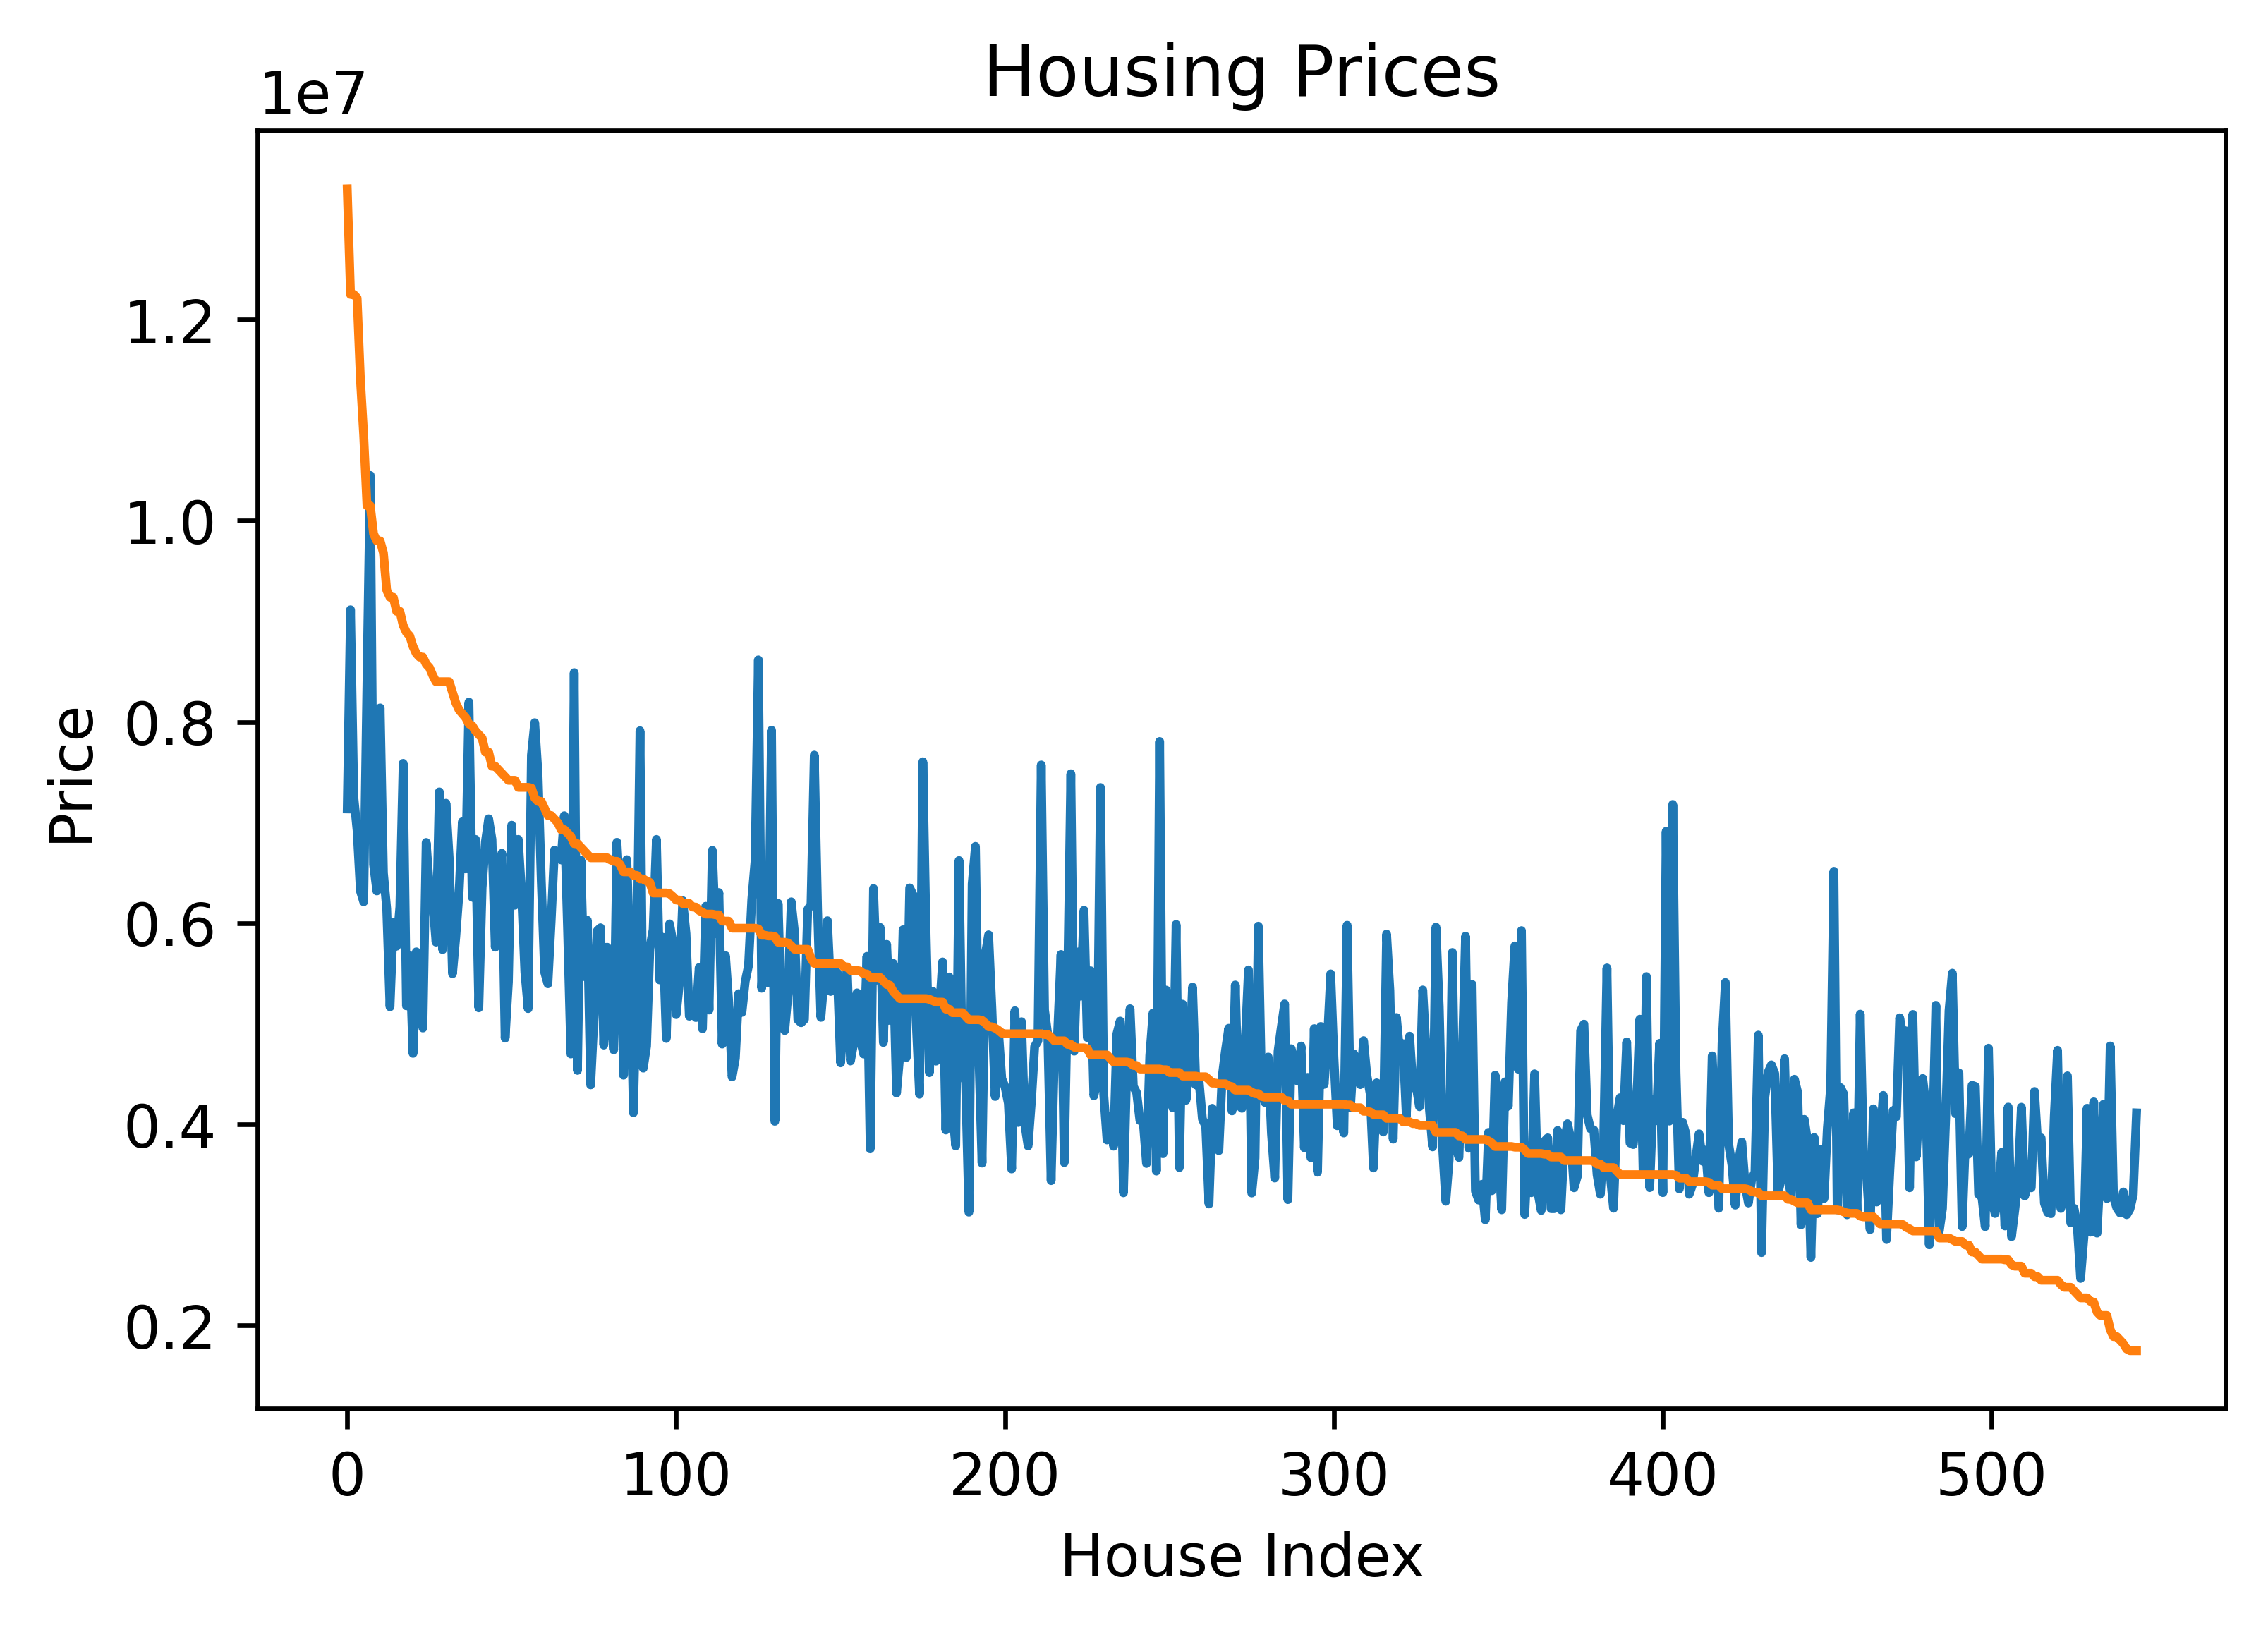

In [62]:
# 3.b Use 5000 epochs for your training. Explore different learning rates from 0.1 to 0.0001 (you need four separate trainings). Report your loss for every 500 epochs per each training.
# Using learning rate 0.0001
n_epochs = 5000
learning_rate = 0.0001

# Reseting Params
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 1.0], requires_grad=True)
# Train params
training_loop(n_epochs, learning_rate, params, x1, x2, x3, x4, x5)
# Model with params
t_p = model(x1, x2, x3, x4, x5, *params)

fig = plt.figure(dpi=600)
plt.xlabel("House Index")
plt.ylabel("Price")
plt.title("Housing Prices")
# Plot model on houses
plt.plot(t_p.detach().numpy())
# Plot house prices
plt.plot(t_u.numpy())


In [17]:
# 3.b Use 5000 epochs for your training. Explore different learning rates from 0.1 to 0.0001 (you need four separate trainings). Report your loss for every 500 epochs per each training.
# Using learning rate 0.001
n_epochs = 5000
learning_rate = 0.001

# Reseting Params
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 1.0], requires_grad=True)
# Apply training loop
training_loop(n_epochs, learning_rate, params, x1, x2, x3, x4, x5)



Epoch 500, Loss nan
Epoch 1000, Loss nan
Epoch 1500, Loss nan
Epoch 2000, Loss nan
Epoch 2500, Loss nan
Epoch 3000, Loss nan
Epoch 3500, Loss nan
Epoch 4000, Loss nan
Epoch 4500, Loss nan
Epoch 5000, Loss nan


tensor([nan, nan, nan, nan, nan, nan], requires_grad=True)

In [18]:
# 3.b Use 5000 epochs for your training. Explore different learning rates from 0.1 to 0.0001 (you need four separate trainings). Report your loss for every 500 epochs per each training.
# Using learning rate 0.01
n_epochs = 5000
learning_rate = 0.01

# Reseting Params
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 1.0], requires_grad=True)
# Apply training loop
training_loop(n_epochs, learning_rate, params, x1, x2, x3, x4, x5)



Epoch 500, Loss nan
Epoch 1000, Loss nan
Epoch 1500, Loss nan
Epoch 2000, Loss nan
Epoch 2500, Loss nan
Epoch 3000, Loss nan
Epoch 3500, Loss nan
Epoch 4000, Loss nan
Epoch 4500, Loss nan
Epoch 5000, Loss nan


tensor([nan, nan, nan, nan, nan, nan], requires_grad=True)

In [19]:
# 3.b Use 5000 epochs for your training. Explore different learning rates from 0.1 to 0.0001 (you need four separate trainings). Report your loss for every 500 epochs per each training.
# Using learning rate 0.1
n_epochs = 5000
learning_rate = 0.1

# Reseting Params
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 1.0], requires_grad=True)
# Apply training loop
training_loop(n_epochs, learning_rate, params, x1, x2, x3, x4, x5)



Epoch 500, Loss nan
Epoch 1000, Loss nan
Epoch 1500, Loss nan
Epoch 2000, Loss nan
Epoch 2500, Loss nan
Epoch 3000, Loss nan
Epoch 3500, Loss nan
Epoch 4000, Loss nan
Epoch 4500, Loss nan
Epoch 5000, Loss nan


tensor([nan, nan, nan, nan, nan, nan], requires_grad=True)

Epoch 500, Loss 2696512686734.713379
Epoch 1000, Loss 2318184773435.221191
Epoch 1500, Loss 2088648266388.312500
Epoch 2000, Loss 1947396484269.651367
Epoch 2500, Loss 1858697932496.546387
Epoch 3000, Loss 1801433157258.685303
Epoch 3500, Loss 1763107250609.892090
Epoch 4000, Loss 1736310509481.270996
Epoch 4500, Loss 1716639634828.789062
Epoch 5000, Loss 1701466170927.005127


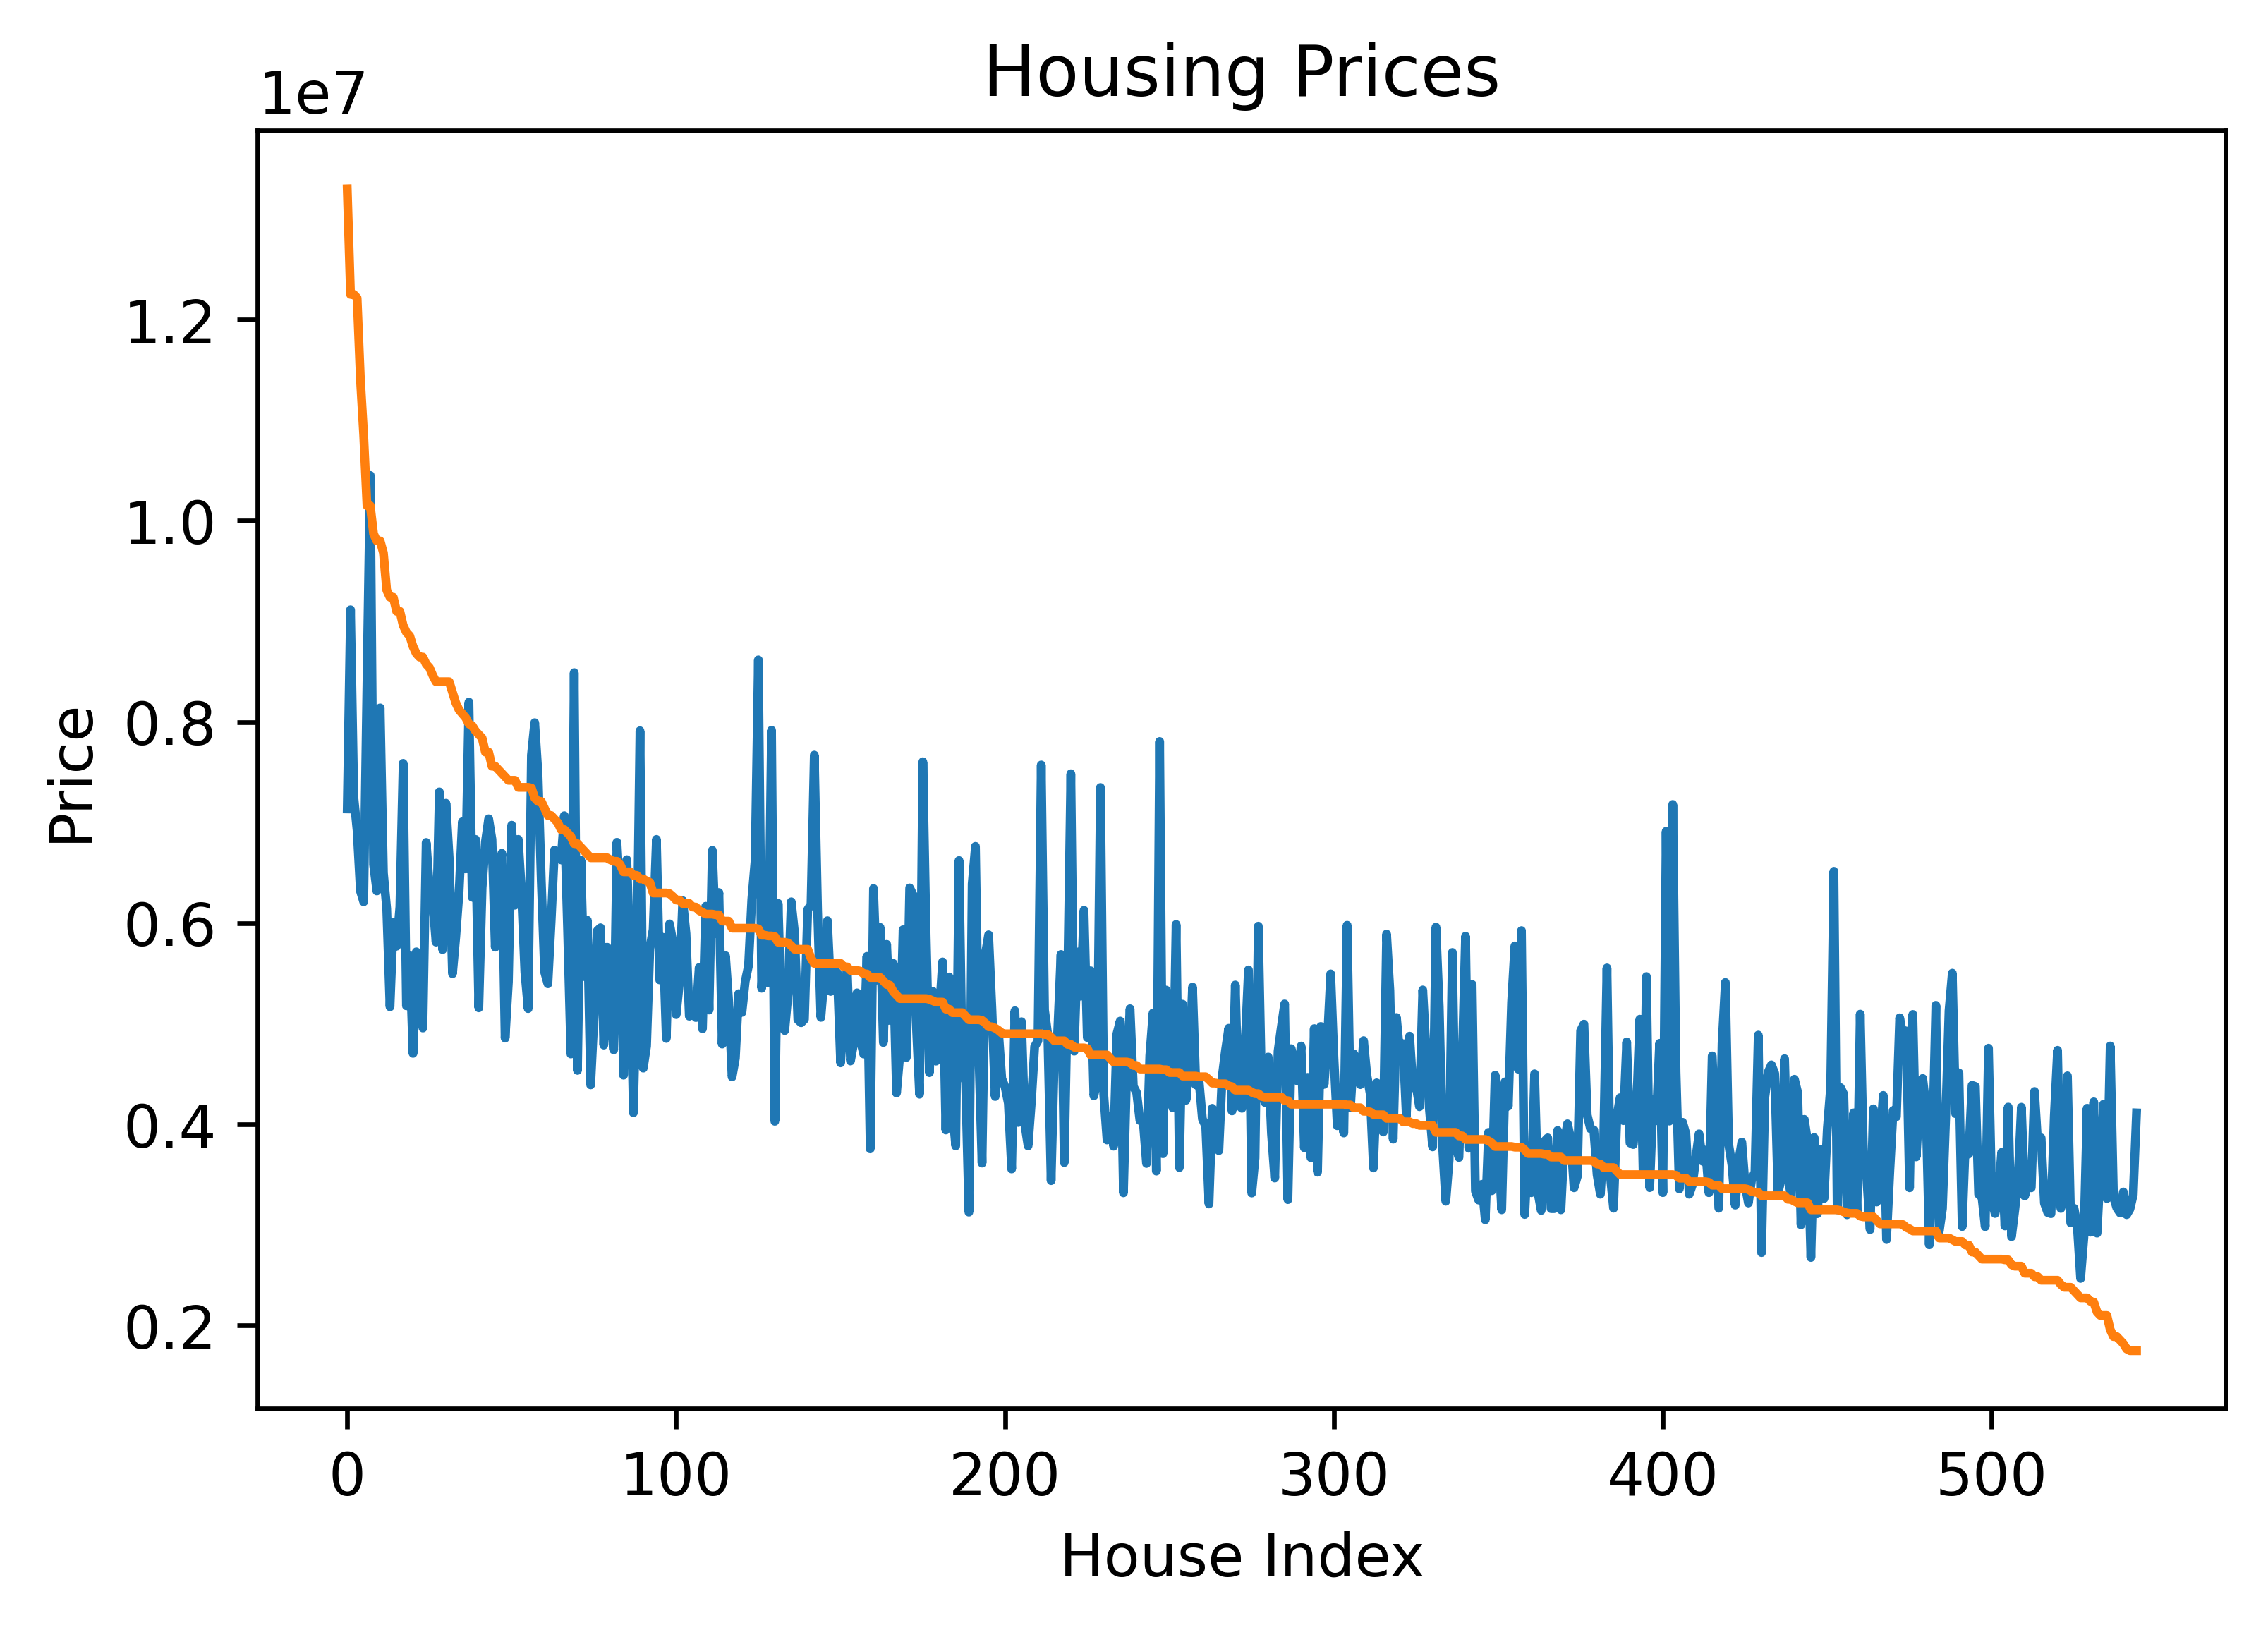

In [25]:
# 3.c Pick the best linear model (the one with the smaller final loss) and visualize it over the input dataset, as we did during the lecture.
n_epochs = 5000
learning_rate = 0.0001

# Reseting Params
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 1.0], requires_grad=True)
# Use training loop on parameters
training_loop(n_epochs, learning_rate, params, x1, x2, x3, x4, x5)
# Apply trained params to model
t_p = model(x1, x2, x3, x4, x5, *params)
# Create figure
fig = plt.figure(dpi=600)
plt.xlabel("House Index")
plt.ylabel("Price")
plt.title("Housing Prices")
# Plot Linear Model
plt.plot(t_p.detach().numpy())
# Plot actual values
plt.plot(t_u.numpy())

In [70]:
# Code to convert Google CoLab to a pdf
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('Homework1.ipynb')

File ‘colab_pdf.py’ already there; not retrieving.





[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/Homework1.ipynb to pdf
[NbConvertApp] Support files will be in Homework1_files/
[NbConvertApp] Making directory ./Homework1_files
[NbConvertApp] Making directory ./Homework1_files
[NbConvertApp] Making directory ./Homework1_files
[NbConvertApp] Writing 61746 bytes to ./notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: [u'xelatex', u'./notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: [u'bibtex', u'./notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 805244 bytes to /content/drive/My Drive/Homework1.pdf


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

'File ready to be Downloaded and Saved to Drive'